In [157]:
import numpy as np

## NumPy

In [163]:
def init():
    global x, w, z, y, delta
    x = 1 * np.ones(2)
    w = [
        0.5 * np.ones((3, 2)),
        0.5 * np.ones((2, 3)),
        0.5 * np.ones((1, 2))
    ]
    z = [
        np.ones(3),
        np.ones(2),
        np.ones(1)
    ]
    y = 1 * np.ones(1)

    delta = [
        np.ones(3),
        np.ones(2),
        np.ones(1)
    ]

init()

In [209]:
f = lambda x: x

In [164]:
def forward(x, w, z):
    z[0] = np.dot(w[0], x)
    for i in range(1, len(w)):
        z[i] = np.dot(w[i], z[i-1])
    return z

forward(x, w, z)

[array([1., 1., 1.]), array([1.5, 1.5]), array([1.5])]

In [165]:
def backward(y, w, z):
    delta[-1] = z[-1] - y  # l1/l2?
    for i in range(len(w)-1, 0, -1):
        delta[i-1] = np.dot(w[i].T, delta[i])
    return delta

backward(y, w, z)

[array([0.25, 0.25, 0.25]), array([0.25, 0.25]), array([0.5])]

In [166]:
def update(x, w, z, delta, eta=1):
    w[0] -= eta * np.outer(delta[0], x)  # +=?
    for i in range(1, len(w)):
        w[i] -= eta * np.outer(delta[i], z[i-1])
    return w

update(x, w, z, delta)

[array([[0.25, 0.25],
        [0.25, 0.25],
        [0.25, 0.25]]),
 array([[0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25]]),
 array([[-0.25, -0.25]])]

In [167]:
init()

for i in range(50):
    z = forward(x, w, z)
    delta = backward(y, w, z)
    w = update(x, w, z, delta, eta=0.1)
    #print('z:', z, 'delta:', delta, 'w:', w, sep='\n')
    #print()

z, delta, w

([array([0.92790055, 0.92790055, 0.92790055]),
  array([1.29149914, 1.29149914]),
  array([1.])],
 [array([3.98829749e-16, 3.98829749e-16, 3.98829749e-16]),
  array([4.298195e-16, 4.298195e-16]),
  array([1.11022302e-15])],
 [array([[0.46395027, 0.46395027],
         [0.46395027, 0.46395027],
         [0.46395027, 0.46395027]]),
  array([[0.46395027, 0.46395027, 0.46395027],
         [0.46395027, 0.46395027, 0.46395027]]),
  array([[0.38714699, 0.38714699]])])

In [214]:
forward(np.array([1, 1]), w, z)

[array([0.92790055, 0.92790055, 0.92790055]),
 array([1.29149914, 1.29149914]),
 array([1.])]

In [215]:
forward(np.array([2, 2]), w, z)

[array([1.85580109, 1.85580109, 1.85580109]),
 array([2.58299827, 2.58299827]),
 array([2.])]

- 权重之和不必为一
- 学习率太高时会跑飞
- 偏置不是必须的

### Bias

In [158]:
def init():
    global x, w, b, z, y, delta
    x = 1 * np.ones(2)
    w = [
        0.5 * np.ones((3, 2)),
        0.5 * np.ones((2, 3)),
        0.5 * np.ones((1, 2))
    ]
    b = [
        0.5 * np.ones(3),
        0.5 * np.ones(2),
        0.5 * np.ones(1)
    ]
    z = [
        np.ones(3),
        np.ones(2),
        np.ones(1)
    ]
    y = 1 * np.ones(1)

    delta = [
        np.ones(3),
        np.ones(2),
        np.ones(1)
    ]

init()

In [159]:
def forward(x, w, z):
    z[0] = np.dot(w[0], x) + b[0]
    for i in range(1, len(w)):
        z[i] = np.dot(w[i], z[i-1]) + b[i]
    return z

forward(x, w, z)

[array([1.5, 1.5, 1.5]), array([2.75, 2.75]), array([3.25])]

In [160]:
def backward(y, w, z):
    delta[-1] = z[-1] - y
    for i in range(len(w)-1, 0, -1):
        delta[i-1] = np.dot(w[i].T, delta[i])
    return delta

backward(y, w, z)

[array([1.125, 1.125, 1.125]), array([1.125, 1.125]), array([2.25])]

In [161]:
def update(x, w, b, z, delta, eta=1):
    w[0] -= eta * np.outer(delta[0], x)
    b[0] -= eta * delta[0]
    for i in range(1, len(w)):
        w[i] -= eta * np.outer(delta[i], z[i-1])
        b[i] -= eta * delta[i]
    return w, b

update(x, w, b, z, delta)

([array([[-0.625, -0.625],
         [-0.625, -0.625],
         [-0.625, -0.625]]),
  array([[-1.1875, -1.1875, -1.1875],
         [-1.1875, -1.1875, -1.1875]]),
  array([[-5.6875, -5.6875]])],
 [array([-0.625, -0.625, -0.625]), array([-0.625, -0.625]), array([-1.75])])

In [162]:
init()

for i in range(1):
    print(i)
    print('z:', z, 'delta:', delta, 'w:', w, 'b', b, sep='\n')
    print()
    z = forward(x, w, z)
    delta = backward(y, w, z)
    w, b = update(x, w, b, z, delta, eta=0.1)

print('z:', z, 'delta:', delta, 'w:', w, 'b', b, sep='\n')

0
z:
[array([1., 1., 1.]), array([1., 1.]), array([1.])]
delta:
[array([1., 1., 1.]), array([1., 1.]), array([1.])]
w:
[array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]]), array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]]), array([[0.5, 0.5]])]
b
[array([0.5, 0.5, 0.5]), array([0.5, 0.5]), array([0.5])]

z:
[array([1.5, 1.5, 1.5]), array([2.75, 2.75]), array([3.25])]
delta:
[array([1.125, 1.125, 1.125]), array([1.125, 1.125]), array([2.25])]
w:
[array([[0.3875, 0.3875],
       [0.3875, 0.3875],
       [0.3875, 0.3875]]), array([[0.33125, 0.33125, 0.33125],
       [0.33125, 0.33125, 0.33125]]), array([[-0.11875, -0.11875]])]
b
[array([0.3875, 0.3875, 0.3875]), array([0.3875, 0.3875]), array([0.275])]


## PyTorch

In [176]:
import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch import nn

In [177]:
training_data = [(Tensor([1., 1.]), 1)]
test_data = training_data
training_data

[(tensor([1., 1.]), 1)]

In [219]:
batch_size = 1

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Get cpu or gpu device for training.
#device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device = 'cpu'
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 3),
            nn.Linear(3, 2),
            nn.Linear(2, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

class SubLoss(nn.Module):
    def __init__(self):
        super(SubLoss, self).__init__()

    def forward(self, output, target):
        return output - target
#loss_fn = SubLoss()
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        print(pred, y)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=3, bias=True)
    (1): Linear(in_features=3, out_features=2, bias=True)
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)
Epoch 1
-------------------------------
tensor([[0.1295]], grad_fn=<AddmmBackward0>) tensor([1])
loss: 0.870456  [    1/    1]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.346312 

Epoch 2
-------------------------------
tensor([[0.6537]], grad_fn=<AddmmBackward0>) tensor([1])
loss: 0.346312  [    1/    1]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.216176 

Epoch 3
-------------------------------
tensor([[1.2162]], grad_fn=<AddmmBackward0>) tensor([1])
loss: 0.216176  [    1/    1]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.392748 

Epoch 4
-------------------------------
tensor([[0.6073]], grad_fn=<AddmmBackward0>) tensor([1])
loss: 0.392748  [    1/    1]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.109145 

Epoch 5
-------------------------------
t

In [220]:
model.eval()
x, y = next(iter(DataLoader(test_data)))
x, y = x.to(device), y.to(device)
with torch.no_grad():
    pred = model(x)
    print(f'Predicted: "{pred[0]}", Actual: "{y}"')

Predicted: "tensor([0.7735])", Actual: "tensor([1])"


## PyTorch MNIST

In [1]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import torchvision.transforms as transforms

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\ProgramData\Miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\ProgramData\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset = datasets.MNIST(root='private', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='private', 
                              train=False, 
                              transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:13<00:00, 761013.51it/s] 


Extracting private\MNIST\raw\train-images-idx3-ubyte.gz to private\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 553603.73it/s]


Extracting private\MNIST\raw\train-labels-idx1-ubyte.gz to private\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 888131.82it/s] 


Extracting private\MNIST\raw\t10k-images-idx3-ubyte.gz to private\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 8683012.20it/s]

Extracting private\MNIST\raw\t10k-labels-idx1-ubyte.gz to private\MNIST\raw



In [4]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()

        # 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()

        # 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()

        # 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

In [6]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 500 == 0:      
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28).requires_grad_().to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.4547782242298126. Accuracy: 89.62000274658203
Iteration: 1000. Loss: 0.3158634305000305. Accuracy: 92.9000015258789
Iteration: 1500. Loss: 0.16209173202514648. Accuracy: 94.27999877929688
Iteration: 2000. Loss: 0.07562467455863953. Accuracy: 96.0999984741211
Iteration: 2500. Loss: 0.10774170607328415. Accuracy: 96.51000213623047
Iteration: 3000. Loss: 0.0684959888458252. Accuracy: 96.80000305175781


In [9]:
def compute_conf_matrix(model, data_loader):
    conf_matrix = np.zeros((10,10))
    for images, labels in data_loader:
        images = images.view(-1, 28*28).requires_grad_().to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        for t, p in zip(labels.view(-1), predicted.view(-1)):
            conf_matrix[t.long(), p.long()] += 1

    return conf_matrix

conf_matrix = compute_conf_matrix(model, test_loader)
print(conf_matrix)

[[9.680e+02 0.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00 3.000e+00
  2.000e+00 2.000e+00 0.000e+00]
 [0.000e+00 1.112e+03 3.000e+00 4.000e+00 0.000e+00 0.000e+00 6.000e+00
  1.000e+00 9.000e+00 0.000e+00]
 [1.100e+01 0.000e+00 1.000e+03 1.000e+00 2.000e+00 0.000e+00 5.000e+00
  4.000e+00 9.000e+00 0.000e+00]
 [2.000e+00 0.000e+00 1.400e+01 9.680e+02 0.000e+00 8.000e+00 0.000e+00
  5.000e+00 8.000e+00 5.000e+00]
 [2.000e+00 0.000e+00 2.000e+00 0.000e+00 9.490e+02 0.000e+00 1.100e+01
  3.000e+00 1.000e+00 1.400e+01]
 [4.000e+00 0.000e+00 0.000e+00 9.000e+00 1.000e+00 8.570e+02 9.000e+00
  1.000e+00 8.000e+00 3.000e+00]
 [6.000e+00 2.000e+00 0.000e+00 0.000e+00 5.000e+00 8.000e+00 9.360e+02
  0.000e+00 1.000e+00 0.000e+00]
 [2.000e+00 6.000e+00 1.500e+01 6.000e+00 1.000e+00 0.000e+00 1.000e+00
  9.830e+02 4.000e+00 1.000e+01]
 [7.000e+00 0.000e+00 2.000e+00 6.000e+00 3.000e+00 4.000e+00 6.000e+00
  3.000e+00 9.420e+02 1.000e+00]
 [8.000e+00 3.000e+00 1.000e+00 8.000e+00 1.300e+01 4.0

Text(69.0, 0.5, 'True')

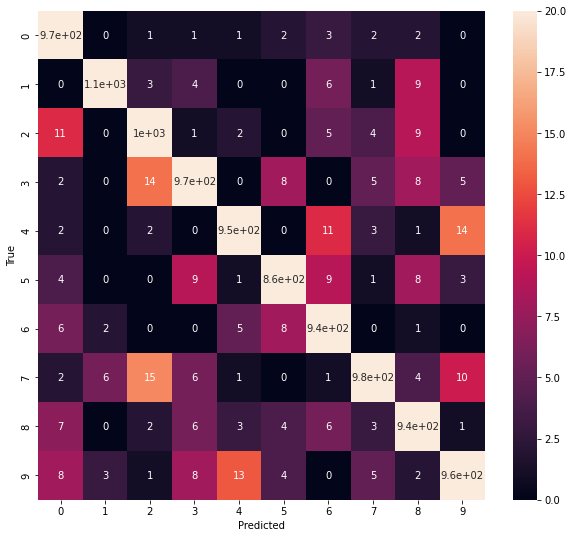

In [10]:
plt.subplots(figsize=(10,9))
ax = sns.heatmap(conf_matrix, annot=True, vmax=20)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

## MindSpore MNIST

In [16]:
from mindvision.dataset import Mnist

download_train = Mnist(path="private/mnist", split="train", batch_size=100, repeat_num=1, shuffle=True, resize=28, download=True)
download_eval = Mnist(path="private/mnist", split="test", batch_size=100, resize=28, download=True)

dataset_train = download_train.run()
dataset_eval = download_eval.run()

In [18]:
class ForwardNN(nn.Cell):      
    def __init__(self):
        super(ForwardNN, self).__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()
        self.fc1 = nn.Dense(784, 100, activation='relu')
        self.fc2 = nn.Dense(100, 100, activation='relu')
        self.fc3 = nn.Dense(100, 100, activation='relu')
        self.fc4 = nn.Dense(100, 10, activation=None)
    
    def construct(self, input_x):
        output = self.flatten(input_x)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)   
        output = self.fc4(output)
        return output 

network = ForwardNN()

In [19]:
# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')

# 定义优化器函数
net_opt = nn.SGD(network.trainable_params(), learning_rate=0.1)

In [20]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数
config_ck = CheckpointConfig(save_checkpoint_steps=6000, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="fnn", directory="private/fnn", config=config_ck)

In [21]:
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={'accuracy'})

# 训练网络模型
model.train(5, dataset_train, callbacks=[ckpoint, LossMonitor(0.1, 1875)])

Epoch time: 3114.337 ms, per step time: 5.191 ms, avg loss: 2.301
Epoch time: 1860.068 ms, per step time: 3.100 ms, avg loss: 0.481
Epoch time: 1878.778 ms, per step time: 3.131 ms, avg loss: 0.132
Epoch:[  3/  5], step:[  600/  600], loss:[0.166/0.166], time:2172.033 ms, lr:0.10000
Epoch time: 2180.566 ms, per step time: 3.634 ms, avg loss: 0.166
Epoch time: 2028.702 ms, per step time: 3.381 ms, avg loss: 0.094


In [22]:
acc = model.eval(dataset_eval)

print("{}".format(acc))

{'accuracy': 0.9659}


In [ ]:
from mindspore import load_checkpoint, load_param_into_net

# 加载已经保存的用于测试的模型
param_dict = load_checkpoint("private/fnn/fnn-1_1875.ckpt")
# 加载参数到网络中
load_param_into_net(network, param_dict)

[]

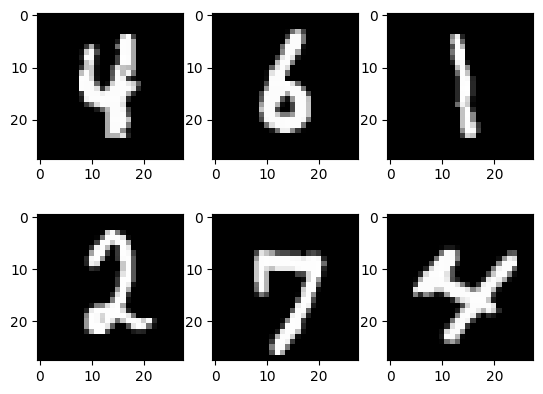

Predicted: "[4 6 1 2 7 4]", Actual: "[4 6 1 2 7 4]"


In [23]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("private/mnist", split="train", batch_size=6, resize=28)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i-1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data['image']))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}", Actual: "{labels}"')

In [24]:
mnist = Mnist("private/mnist", split="train", batch_size=32, resize=28)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()

conf_matrix = np.zeros((10,10))

for data in ds_test:
    images = data["image"].asnumpy()
    labels = data["label"].asnumpy()
    
    output = model.predict(Tensor(data['image']))
    predicted = np.argmax(output.asnumpy(), axis=1)
    
    # update confusion matrix
    for t, p in zip(labels, predicted):
        conf_matrix[t, p] += 1

        
print(conf_matrix)

[[5.830e+03 0.000e+00 1.800e+01 4.000e+00 1.000e+00 2.300e+01 3.000e+01
  0.000e+00 1.300e+01 4.000e+00]
 [0.000e+00 6.661e+03 2.800e+01 5.000e+00 1.000e+00 0.000e+00 2.000e+00
  1.100e+01 3.400e+01 0.000e+00]
 [1.800e+01 1.300e+01 5.869e+03 1.100e+01 9.000e+00 2.000e+00 7.000e+00
  6.000e+00 2.100e+01 2.000e+00]
 [4.000e+00 0.000e+00 6.500e+01 5.916e+03 0.000e+00 5.900e+01 0.000e+00
  7.000e+00 6.000e+01 2.000e+01]
 [1.000e+00 8.000e+00 8.000e+00 0.000e+00 5.703e+03 1.000e+00 3.700e+01
  6.000e+00 1.200e+01 6.600e+01]
 [1.000e+01 0.000e+00 6.000e+00 3.100e+01 5.000e+00 5.287e+03 1.300e+01
  0.000e+00 5.300e+01 1.600e+01]
 [9.000e+00 2.000e+00 7.000e+00 0.000e+00 7.000e+00 2.700e+01 5.842e+03
  0.000e+00 2.400e+01 0.000e+00]
 [4.000e+00 5.600e+01 1.440e+02 2.500e+01 3.100e+01 1.000e+00 0.000e+00
  5.888e+03 1.400e+01 1.020e+02]
 [3.000e+00 1.700e+01 1.900e+01 1.600e+01 7.000e+00 2.000e+01 7.000e+00
  1.000e+00 5.751e+03 1.000e+01]
 [1.800e+01 2.000e+00 5.000e+00 1.500e+01 5.400e+01 1.9

Text(95.72222222222221, 0.5, 'True')

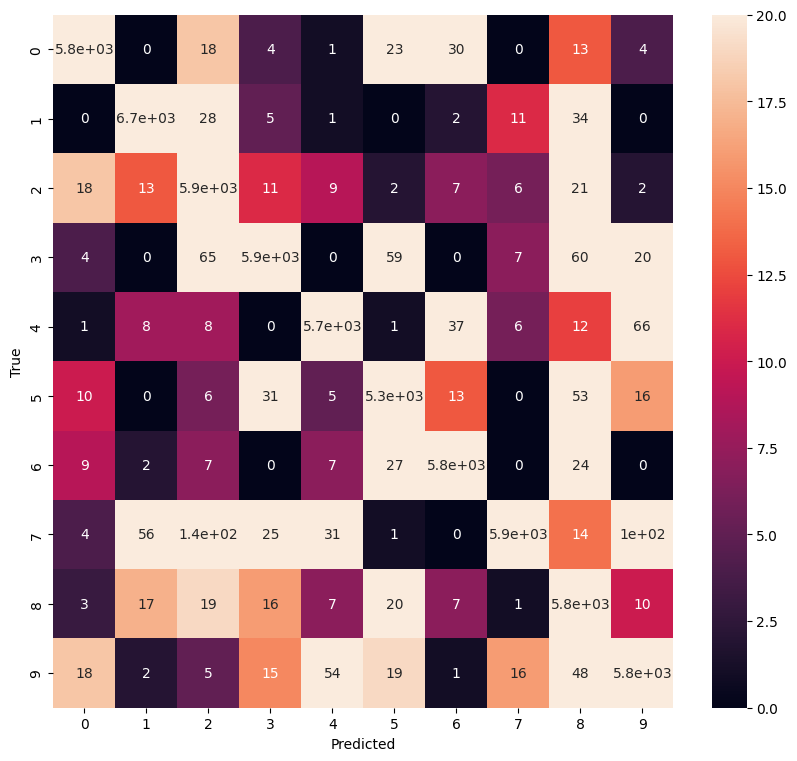

In [25]:
import seaborn as sns

plt.subplots(figsize=(10,9))
ax = sns.heatmap(conf_matrix, annot=True, vmax=20)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')